# Actividad Evaluable: Exploración de Datos: Análisis Estadístico - Mapas de calor y boxplots
# Ruth Sarai Méndez Jiménez A01351642

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

## **a) Descripción de las variables**
**Pregnancies** número de embarazos, variable cuantitativa discreta, rango [0:17]

**Glucose** nivel de glucosa, variable cuantitativa discreta, rango[0:199]

**BloodPressure** presión arterial, variable cuantitativa discreta, rango [0:122]

**SkinThickness** grosor de la piel, variable cuantitativa discreta, rango [0:99]

**Insulin** nivel de insulina, variable cuantitativa discreta, rango [0:846]

**BMI** índice de masa corporal, variable cuantitativa continua, rango [0:67.1]

**DiabetesPedigreeFunction** Función de pedigree de diabetes, variable cuantitativa continua, rango[0.078:2.42]

**Age** Edad, variable cuantitativa continua, rango [21:81] 

**Outcome** Resultado (ser o no diabetic@), variable cualitativa ordinal, 0:no tiene 1:tiene 

In [3]:
diabetes=pd.read_csv("diabetes.csv")

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## b) Exploración de datos

In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Valores nulos
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 1. Medidas de tendencia central

In [9]:
#Medidas de tendencia central para cada una de las variables
media = diabetes.mean()
mediana =diabetes.median()
moda= diabetes["DiabetesPedigreeFunction"].mode()
desviacion=diabetes.std()
print ("La media de cada variable es:","\n",media,"\n") 
print ("La mediana de cada variable es:","\n",mediana,"\n")
print ("La desviación estándar de cada variables es:","\n",desviacion,"\n")
print("La probabilidad de tener diabetes por génetica más repetida fue: ", moda)

La media de cada variable es: 
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64 

La mediana de cada variable es: 
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64 

La desviación estándar de cada variables es: 
 Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin      

In [10]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Con la información obtenida se puede observar que el promedio de embarazos es de 3.84, se sabe que el nivel normal de glucosa es por debajo de 140 mg/dl y al tener un promedio de 120.89 se puede decir que la mayoría de las personas tienen un nivel de glucosa normal con una desviación de +/- 31.97, de igual forma la presión sanguinea se encuentra en promedio dentro de lo aceptable con una desviación de 19.35, un aspecto importante a considerar el la probabilidad de que tengan diabetes por génetica, en este caso se observa que en promedio se tiene 0.47, por lo que no es tan probable que les de diabetes, las personas en el estudio son adultas.
Y el valor central fue que no se tiene diabetes, finalmente el resultado más repestido fue que la mayoría de las personas no tienen diabetes, esto resulta lógico ya que coincide con el análisis realizado.

### 2.Visualización de datos
### Variables cualitativas

In [11]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

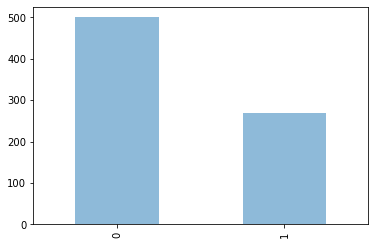

In [12]:
diabetes.Outcome.value_counts().plot(kind="bar",alpha=0.5) 

<AxesSubplot:ylabel='Outcome'>

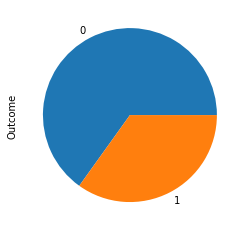

In [13]:
grafica=diabetes.Outcome.value_counts()
grafica.plot(kind='pie')

### Variables cuantitativas

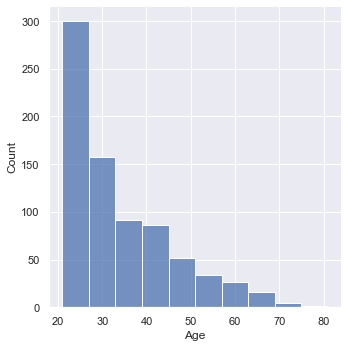

In [14]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.displot(diabetes['Age'], bins=10)
plt.show()

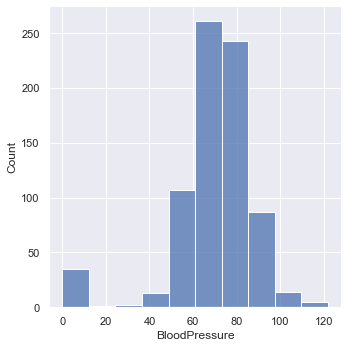

In [21]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.displot(diabetes['BloodPressure'], bins=10)
plt.show()

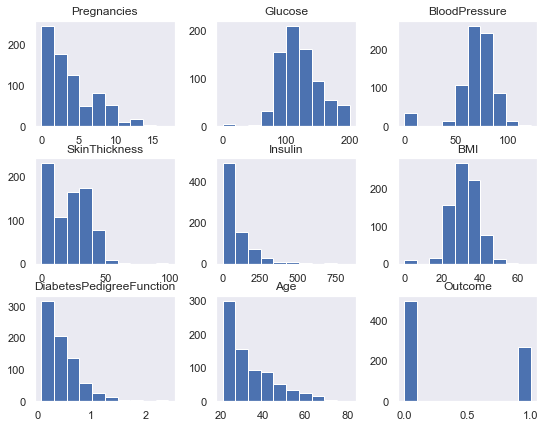

In [15]:
diabetes.hist(bins=10,figsize=(9,7),grid=False);

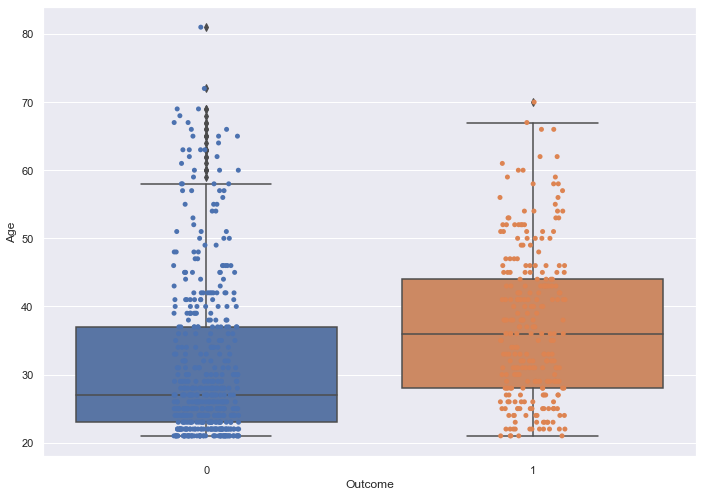

In [16]:
ax = sns.boxplot(x="Outcome", y="Age", 
                data=diabetes)

ax = sns.stripplot(x="Outcome", y="Age",
                   data=diabetes, jitter=True,
                   edgecolor="gray")

Se puede observar que en el Outcome 1(personas con diabetes) la mayoría de las edades se encuentran dentro de los cuartiles, por lo que se puede decir que la edad de la mayoría de las personas con diabetes se cuentran dentro del rango de edad.

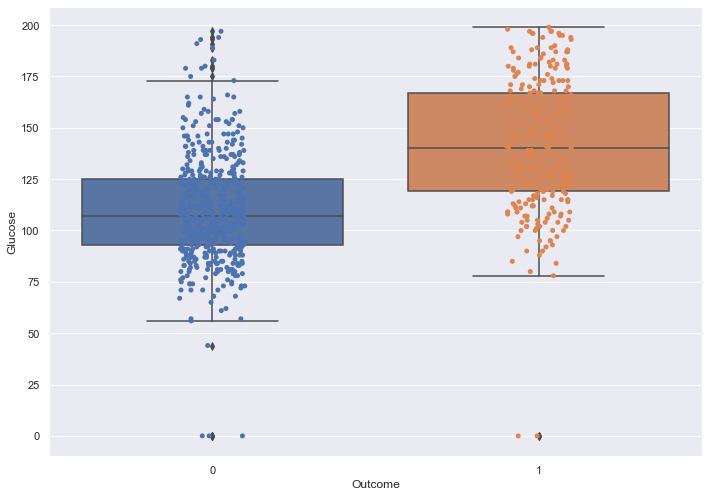

In [17]:
ax = sns.boxplot(x="Outcome", y="Glucose", 
                data=diabetes)

ax = sns.stripplot(x="Outcome", y="Glucose",
                   data=diabetes, jitter=True,
                   edgecolor="gray")

Se puede observar que las personas diabeticas tienen un nivel más alto de glucosa, y las personas se encuentran dentro del rango.

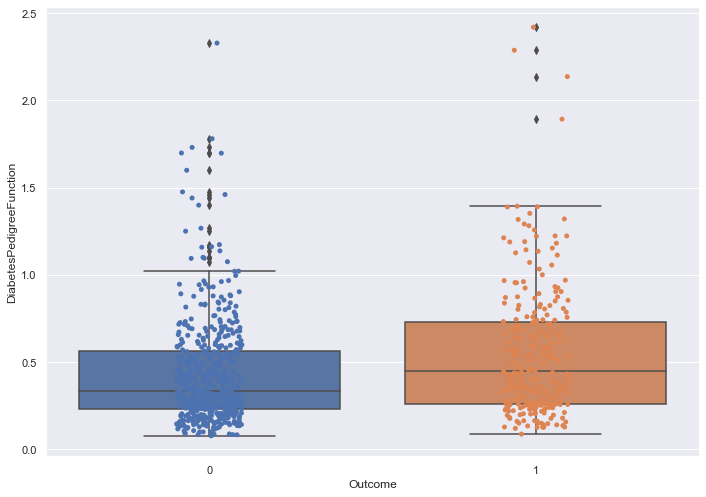

In [18]:
ax = sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", 
                data=diabetes)

ax = sns.stripplot(x="Outcome", y="DiabetesPedigreeFunction",
                   data=diabetes, jitter=True,
                   edgecolor="gray")

Se puede observar que las personas diabeticas nuevamente son las que tienen sus datos de pedigree function dentro del rango

Text(0.5, 1.0, 'Correlación entre variables')

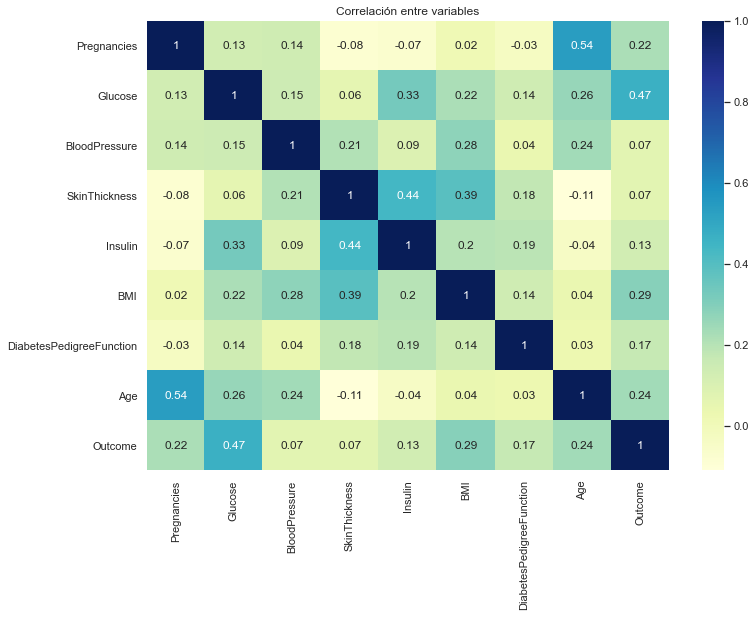

In [19]:
correlacion = diabetes.corr().round(2)
sns.heatmap(data=correlacion, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlación entre variables')

Se puede observar que el resultado tiene una correlación con el nivel de glucosa de la persona

**¿Hay alguna variable que no aporta información?**

Skin Thickness(grosor de la piel) y BloodPressure(presión arterial), aporta información que no es relevante para el estudio, se puede observar en el mapa de calor que son las que tienen menor correlación con el hecho de ser o no una persona con diabetes.

**Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?**

Skin thickness porque en general el análisis se basa en las personas diabeticas, y el grosor de la piel es la única variables que no aporta información, a diferencia de la presión arterial, la cual aunque en el mapa de calor muestra que no existe una fuerte correlación, se sabe que a largo plazo la diabetes puede influir en la presión arterial, por lo que puede ser importante considerarla si se llega a realizar un nuevo análisis con información actualizada.

**¿Existen variables que tengan datos extraños?**

Las variables Glucose, BloodPressure, SkinThickness, Insulin y BMI tienen valores con valor a cero, lo cual no puede ser posible, se puede considerar que esos datos no fueron recabados, es decir son valores nulos, tomando como ejemplo BloodPressure(presión arterial) si una persona tuviera una presión de 0, significaría que está muerta, lo cual no resulta lógico en el análisas.

**Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?**

No se encuentran dentro de los mismos rangos ya que cada variable se mide de diferente manera, lo único que se puede decir que es la mayoría tiene como rango inferior el valor de cero, a excepción de DiabetesPedigreeFuncion y Age.